### TAREFA

In [45]:
#Nome: Rodolfo Oliveira Ruback

**Ex1**: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.head() #Verificando as primeiras 5 linhas da tabela de dados
df_sexSurv = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack() # Frequencia Absoluta Sexo x Sobreviveu

In [47]:
df_sexSurv['total'] = df_sexSurv[[0]].values + df_sexSurv[[1]].values  #Adicionando a coluna Total
df_sexSurv

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [3]:
df_sexSurv_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_sexSurv_pct

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


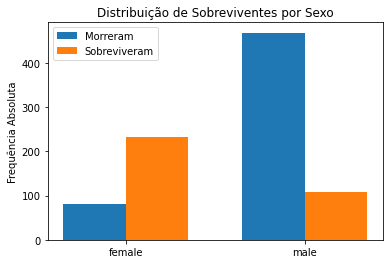

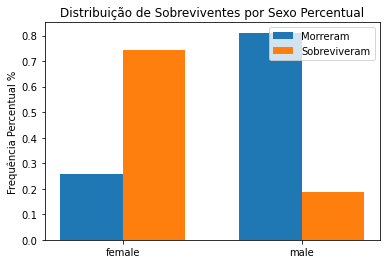

In [4]:
labels = list(df_sexSurv.index) #labels do gráfico de barras

morreram = df_sexSurv[0].values #valores para construção do grafico de barras
sobreviveram = df_sexSurv[1].values #valores para construção do grafico de barras

morreram_pct = df_sexSurv_pct[0].values #valores para construção do grafico de barras
sobreviveram_pct= df_sexSurv_pct[1].values #valores para construção do grafico de barras


x = np.arange(len(labels))  #localização dos labels
width = 0.35  # largura das barras

fig, ax = plt.subplots() #construção do frame, criando figura e eixos

rects1 = ax.bar(x - width/2, morreram, width, label='Morreram') #valores para construção do gráfico de barras
rects2 = ax.bar(x + width/2, sobreviveram, width, label='Sobreviveram')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência Absoluta') #legenda eixo y
ax.set_title('Distribuição de Sobreviventes por Sexo') #titulo
ax.set_xticks(x) #seta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() #legenda do gráfico
plt.show()

fig, ax1 = plt.subplots()
rects3 = ax1.bar(x - width/2, morreram_pct, width, label='Morreram')
rects4 = ax1.bar(x + width/2, sobreviveram_pct, width, label='Sobreviveram')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Frequência Percentual %')
ax1.set_title('Distribuição de Sobreviventes por Sexo Percentual')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()


In [5]:
# Distribuição percentual da variável Sexo:
dist_pct = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))
dist_pct
dist_pct.iloc[0].values



array([0.62])

In [6]:
# Valores esperados, caso não tivéssemos relação entre Sexo e Sobreviventes
esp_0 = df_sexSurv.total.values * dist_pct.iloc[0].values
esp_1 = df_sexSurv.total.values * dist_pct.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [7]:
# Cálculo do Chi - Quadrado
# Observado menos o esperado: o_i - e_i == desvio
desvios = (df_sexSurv.iloc[:,:2].values - df_esp.values)
print(desvios)

#(o_i - e_i)^2
desvios_ao_quadrado = desvios**2

#(o_i - e_i)^2 / e_i

chi_quad = sum(sum(desvios_ao_quadrado/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad, "indicando uma 'boa' relação entre as variáveis!")

[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303 indicando uma 'boa' relação entre as variáveis!


Ex3: Use o dataframe df, carregado abaixo, onde  cada observação corresponde a uma reclamação feita 
pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?<br>
2 - Qual a quantidade de reclamações por sexo?<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?<br>
4 - Proporção de reclamações registradas e não respondidas.<br>
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 
**Importante**: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [48]:
import pandas as pd

df2 = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df2.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [82]:
# Exercício 3.1
df_RecUF = df2.groupby('UF').apply(lambda x: x.Total.value_counts()) # Frequencia Absoluta Reclamações por Estado
RecUf = df2['UF'].value_counts().sort_index()
df_RecUF 

Total,1
UF,
AC,449
AL,104
AM,291
AP,18
BA,2443
CE,1068
DF,1805
ES,1081
GO,886


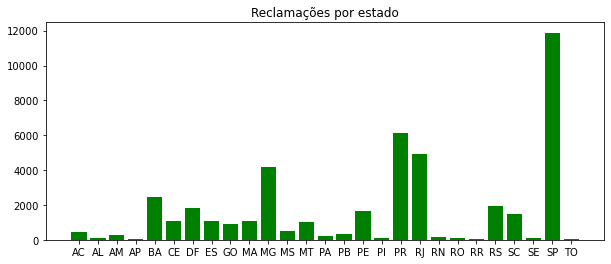

In [83]:
plt.figure(figsize=[10,4])
plt.bar(RecUf.index, RecUf.values, color = 'green')
plt.title('Reclamações por estado')
plt.show()

In [16]:
# Exercício 3.2
df_RecSexo = df2.groupby('Sexo').apply(lambda x: x.Total.value_counts()) # Frequencia Absoluta Reclamações por Sexo
df_RecSexo

Total,1
Sexo,
F,16092
M,27895


In [17]:
# Exercício 3.3
df2.columns # Verificando os nomes das colunas (para tirar espaço das que usarei)

Index(['Gestor', 'Canal de Origem', 'Região', 'UF', 'Cidade', 'Sexo',
       'Faixa Etária', 'Ano Abertura', 'Mês Abertura', 'Data Abertura',
       'Hora Abertura', 'Data Resposta', 'Hora Resposta', 'Data Análise',
       'Hora Análise', 'Data Recusa', 'Hora Recusa', 'Data Finalização',
       'Hora Finalização', 'Prazo Resposta', 'Prazo Analise Gestor',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Análise da Recusa', 'Edição de Conteúdo',
       'Interação do Gestor', 'Total'],
      dtype='object')

In [50]:
df2.rename(columns = {'Nota do Consumidor': 'Nota', 'Tempo Resposta': 'Tempo_Resposta', 'Ano Abertura': 'Ano_Abertura', 'Mês Abertura':'Mes_Abertura', 'Data Finalização':"Data_Finalizacao", 'Data Abertura':'Data_Abertura'}, inplace = True)
df2.columns

Index(['Gestor', 'Canal de Origem', 'Região', 'UF', 'Cidade', 'Sexo',
       'Faixa Etária', 'Ano_Abertura', 'Mes_Abertura', 'Data_Abertura',
       'Hora Abertura', 'Data Resposta', 'Hora Resposta', 'Data Análise',
       'Hora Análise', 'Data Recusa', 'Hora Recusa', 'Data_Finalizacao',
       'Hora Finalização', 'Prazo Resposta', 'Prazo Analise Gestor',
       'Tempo_Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota', 'Análise da Recusa', 'Edição de Conteúdo',
       'Interação do Gestor', 'Total'],
      dtype='object')

In [19]:
df2NotaTempo = df2[["Nota", "Tempo_Resposta"]]

In [20]:
df2NotaTempo

,Nota,Tempo_Resposta
0,NaN,5.0
1,1.0,6.0
2,5.0,5.0
3,5.0,0.0
4,NaN,1.0
...,...,...
43982,NaN,10.0
43983,1.0,5.0
43984,1.0,3.0
43985,NaN,8.0


In [21]:
df2NotaTempo.groupby(['Nota'])["Tempo_Resposta"].mean()

Nota
1.0    7.219847
2.0    7.045891
3.0    6.512574
4.0    6.166163
5.0    5.844847
Name: Tempo_Resposta, dtype: float64

In [22]:
df2NotaTempo = df2NotaTempo.dropna() # Dropando os valores NaN
df2NotaTempo

,Nota,Tempo_Resposta
1,1.0,6.0
2,5.0,5.0
3,5.0,0.0
5,3.0,10.0
7,1.0,10.0
...,...,...
43978,1.0,6.0
43979,5.0,9.0
43983,1.0,5.0
43984,1.0,3.0


In [20]:
df2NotaTempo.groupby(['Nota'])["Tempo_Resposta"].mean() #Verificando se a retiradas dos valores NaN interferem na média

Nota
1.0    7.219847
2.0    7.045891
3.0    6.512574
4.0    6.166163
5.0    5.844847
Name: Tempo_Resposta, dtype: float64

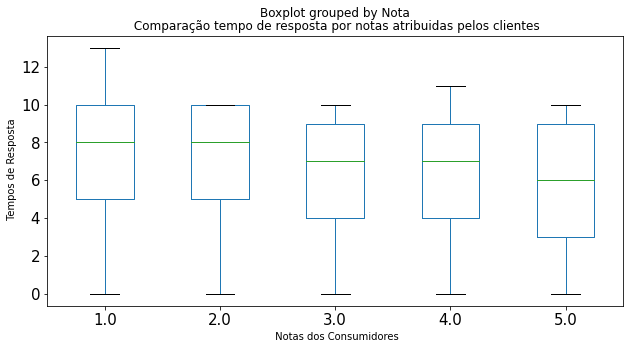

In [23]:
#Não ocorre alteração de valores médios devido à retirada dos NaN
df2NotaTempo.boxplot(column= 'Tempo_Resposta', by = 'Nota',fontsize=15,figsize=[10,5],grid = False )
plt.xlabel(" Notas dos Consumidores")
plt.ylabel(" Tempos de Resposta")
plt.title(" Comparação tempo de resposta por notas atribuidas pelos clientes")
plt.show()


In [24]:
# Pode-se perceber pelos Bloxpots que de fato, as notas inferiores são frutos de tempos superiores de resposta.
# Calculando o R²:

var_global = np.var(df2NotaTempo.Tempo_Resposta)

#calculando a variância em cada categoria de Nota 1 a 5
var_categ = df2NotaTempo.groupby('Nota').apply(lambda x: np.var(x.Tempo_Resposta))
total_categ = df2NotaTempo.Nota.value_counts().sort_index()

#Variância ponderada pelo número de observações na categoria
var1 = (total_categ[1] * var_categ[1] + total_categ[2]* var_categ[2] + total_categ[3]* var_categ[3] + total_categ[4]* var_categ[4] + total_categ[5]* var_categ[5])
var2 = (total_categ[1] + total_categ[2] + total_categ[3] + total_categ[4] + total_categ[5])

var_ = var1/var2
#r quadrado
r_quad = (var_global - var_)/ var_global ; 

print("O r-quadrado para Tempo_Resposta e Nota é:", round(r_quad*100,2))

O r-quadrado para Tempo_Resposta e Nota é: 3.52


In [25]:
#Vemos que a correlação das variáveis Tempo_Resposta e Nota é baixa, no sentido de que apenas 3,52% da variância do Tempo de Resposta é explicado pela variável Nota. 

In [26]:
# Exercício 3.4 - Proporção de Reclamações Registradas e não respondidas

df_Resposta = df2.groupby('Respondida').apply(lambda x: x.Total.value_counts()) # Frequencia Absoluta Reclamações por Estado
df_Resposta

Total,1
Respondida,
N,2026
S,41961


In [65]:
df_Resposta_pct =  df2.groupby('Respondida').apply(lambda x: x.Total.value_counts()/df2.shape[0]*100)
Resp_pct = df2['Respondida'].value_counts()/df2.shape[0]*100
Resp_pct = Resp_pct.sort_values()

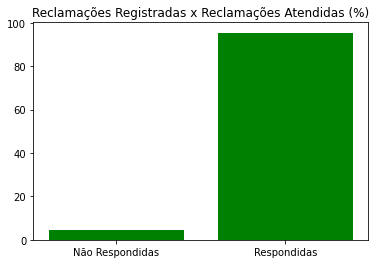

In [66]:
plt.bar(Resp_pct.index, Resp_pct.values, color ='green')
plt.title('Reclamações Registradas x Reclamações Atendidas (%)')
plt.xticks(x, ('Não Respondidas','Respondidas'))
plt.show()

In [57]:
# 3.5 - Qual foi o volume de reclamações por mês no ano de 2014 (ano único dos dados)?
df_Mes = df2.groupby('Mes_Abertura').apply(lambda x: x.Total.value_counts()) # Frequencia Absoluta Reclamações por Mês
df_Mes2 = df2['Mes_Abertura'].value_counts().sort_values()
df_Mes

Total,1
Mes_Abertura,
5,150
6,2202
7,6337
8,5286
9,6336
10,7096
11,7458
12,9122


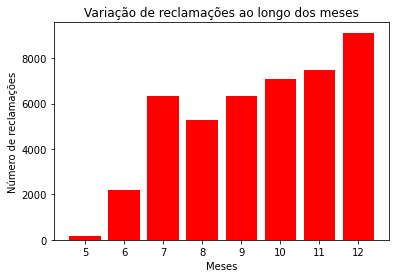

In [56]:
#Gráfico de Linhas - mostrando a variação de reclamações por mês
plt.bar(df_Mes2.index, df_Mes2.values, color = 'red')
plt.title('Variação de reclamações ao longo dos meses')
plt.xlabel('Meses')
plt.ylabel('Número de reclamações')
plt.show()

In [64]:
#3.6 Quais são os segmentos de mercado com maior número de reclamações?


In [103]:
df_Mercado = df2.groupby('Segmento de Mercado').apply(lambda x: x.Total.value_counts()) # Frequencia Absoluta Reclamações por Estado
df_Mercado

Administradoras de Consórcios                                                139
Agências de Viagens                                                          324
Artigos Esportivos                                                             6
Bancos de Dados e Cadastros de Consumidores                                   18
Bancos, Financeiras e Administradoras de Cartão                             8809
Comércio Eletrônico                                                         6074
Corretoras e Sociedades de Seguros, Capitalização e Previdência              378
Editoras                                                                       2
Empresas de Pagamento Eletrônico                                              25
Empresas de Recuperação de Crédito                                            44
Energia Elétrica, Gás, Água e Esgoto                                          73
Estabelecimentos de Ensino                                                     1
Fabricantes - Eletroeletrôni

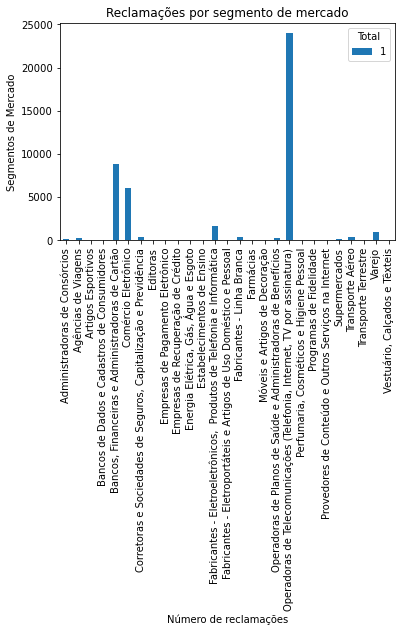

In [107]:
df_Mercado.plot(kind = 'bar')
plt.title('Reclamações por segmento de mercado')
plt.xlabel('Número de reclamações')
plt.ylabel('Segmentos de Mercado')
plt.show()